In [6]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: jle 
no latency information found for instruction: retq 


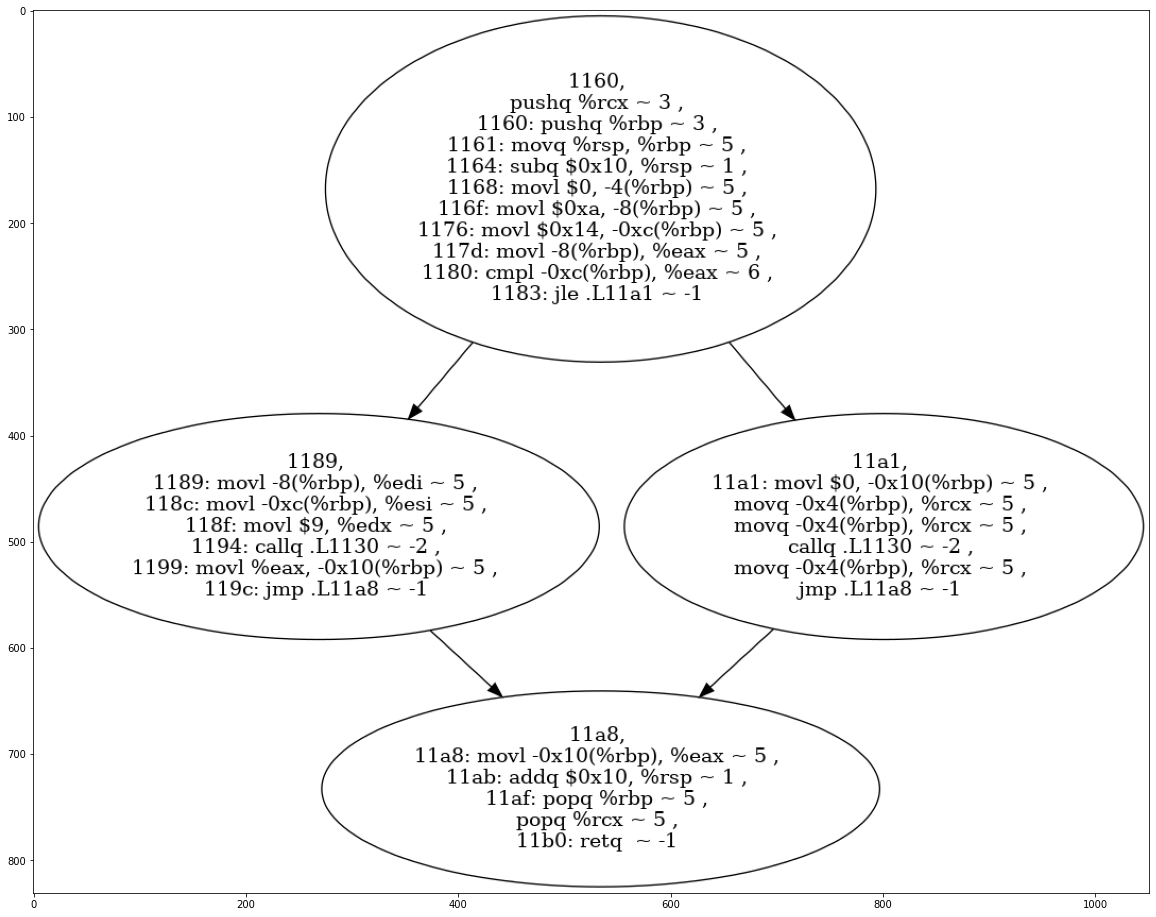

In [9]:
from rwtools.nemesis.nemesistool import NemesisInstrument 

figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./multiple_functions/multiple_functions")
outputfile = "./multiple_functions_rw.s"

nemesis = NemesisInstrument(binary, outputfile, "main")


target_node = nemesis.cfg.get_node('1160')

nemesis.cfg.insert_nodes(target_node)
nemesis.cfg.equalize_branches(target_node)

nemesis.align(target_node)
# nemesis.instrument(target_node)

axs.imshow(nemesis.render_cfg())

nemesis.dump()

In [ ]:
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./multiple_functions/multiple_functions")
outputfile = "./multiple_functions_rw.s"

nemesis = NemesisInstrument(binary, outputfile, "foo")

axs.imshow(nemesis.render_cfg())

In [ ]:
from rwtools.nemesis.evaluationtool import NemesisEvaluation
figs, axs = plt.subplots(1, figsize=(20,20))

binary = "/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks/a.out"
evaluation = NemesisEvaluation(binary, "foo")
axs.imshow(evaluation.render_cfg())

target_node = nemesis.cfg.get_node('1130')
evaluation.run_evaluation(target_node)